## 数据预处理技术

In [1]:
%matplotlib notebook
import numpy as np
from sklearn import preprocessing,linear_model
import matplotlib.pyplot as plt

In [2]:
data=np.array([[3,-1.5,2,-5.4],
               [0,4,-0.3,2.1],
               [1,3.3,-1.9,-4.3]])

### 均值移除

In [3]:
data_standardized=preprocessing.scale(data) # scale   (x-mean)/sigma
print(data_standardized)

[[ 1.33630621 -1.40451644  1.29110641 -0.86687558]
 [-1.06904497  0.84543708 -0.14577008  1.40111286]
 [-0.26726124  0.55907936 -1.14533633 -0.53423728]]


In [4]:
print(data_standardized.mean(axis=0))
print(data_standardized.std(axis=0))

[ 5.55111512e-17 -1.11022302e-16 -7.40148683e-17 -7.40148683e-17]
[1. 1. 1. 1.]


### 范围缩放

In [5]:
data_scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
# scaled X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#X_scaled = X_std * (max - min) + min
data_scaled=data_scaler.fit_transform(data)
print(data_scaled)

[[1.         0.         1.         0.        ]
 [0.         1.         0.41025641 1.        ]
 [0.33333333 0.87272727 0.         0.14666667]]


### 归一化

In [6]:
data_normalized=preprocessing.normalize(data,norm='l1')
print(data_normalized)

[[ 0.25210084 -0.12605042  0.16806723 -0.45378151]
 [ 0.          0.625      -0.046875    0.328125  ]
 [ 0.0952381   0.31428571 -0.18095238 -0.40952381]]


### 二值化

In [7]:
data_binarized=preprocessing.Binarizer(threshold=1.4).transform(data)
print(data_binarized)

[[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]]


### 独热编码

In [8]:
encoder=preprocessing.OneHotEncoder()
encoder.fit([[0,2,1,12],
            [1,3,5,3],
            [2,3,2,12],
            [1,2,4,3]])
encoded_vector=encoder.transform([[2,3,5,3]]).toarray()
print(encoded_vector)
# 找出transform内数组在数据中的位置，并用二进制编码
# https://www.cnblogs.com/zhoukui/p/9159909.html

[[0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]]


## 标记编码方法

In [9]:
label_encoder=preprocessing.LabelEncoder()
input_classes=['audi','ford','audi','toyota','ford','bmw']
label_encoder.fit(input_classes)
for i,item in enumerate(label_encoder.classes_):
    print(item,'-->',i)

audi --> 0
bmw --> 1
ford --> 2
toyota --> 3


In [10]:
labels=['toyota','ford','audi']
encoderd_labels=label_encoder.transform(labels)
print(encoderd_labels)

[3 2 0]


In [11]:
encoded_labels=[2,3,1,0,2,1]
decoded_labels=label_encoder.inverse_transform(encoded_labels)
print(decoded_labels)

['ford' 'toyota' 'bmw' 'audi' 'ford' 'bmw']


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [12]:
import sys
filename='data.txt'
X=[]
Y=[]

In [18]:
with open(filename,'r') as f:
    for line in f.readlines():
        xt,yt=[float(i) for i in line.split('\t')]
        X.append(xt)
        Y.append(yt)
print(X.sample(frac=0.8))

AttributeError: 'list' object has no attribute 'sample'

In [14]:
num_training=int(0.8*len(X))
num_test=len(X)-num_training

X_train=np.array(X[:num_training]).reshape((num_training,1))
Y_train=np.array(Y[:num_training])

# test
X_test=np.array(X[num_training:]).reshape((num_test,1))
Y_test=np.array(Y[num_training:])

In [15]:
linear_regressor=linear_model.LinearRegression()
linear_regressor.fit(X_train,Y_train)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<IPython.core.display.Javascript object>


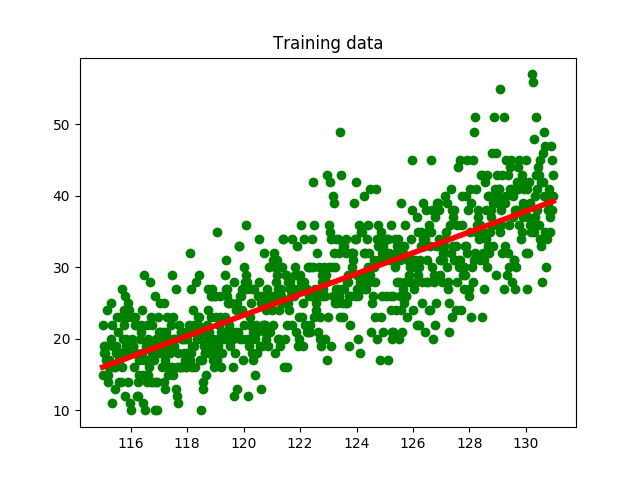

In [16]:
Y_train_pred=linear_regressor.predict(X_train)
plt.figure()
plt.scatter(X_train,Y_train,color='green')
plt.plot(X_train,Y_train_pred,color='red',linewidth=4)
plt.title('Training data')
plt.show()

<IPython.core.display.Javascript object>


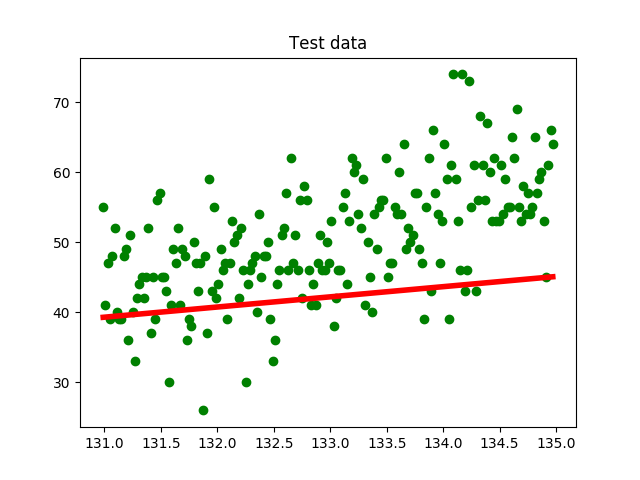

In [23]:
Y_test_pred=linear_regressor.predict(X_test)
plt.figure()
plt.scatter(X_test,Y_test,color='green')
plt.plot(X_test,Y_test_pred,color='red',linewidth=4)
plt.title('Test data')
plt.show()

In [21]:
import sklearn.metrics as sm

In [26]:
print(sm.mean_absolute_error(Y_test,Y_test_pred),2)
print(sm.mean_squared_error(Y_test,Y_test_pred),2)
print(sm.explained_variance_score(Y_test,Y_test_pred),2)
print(sm.median_absolute_error(Y_test,Y_test_pred),2)
print(sm.r2_score(Y_test,Y_test_pred),2)

9.09998706559893 2
123.54619405180621 2
0.19477238025460042 2
8.599578596836295 2
-0.6905661525614468 2
